<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2024 </h4>
    <hr>
    <h1> Lab 2: Linear Regression </h1>
    <h3></h3>
</center>

## <center> Case 1: Salary of the IT industry

## Coding section (Preview)

<font face="Times New Roman">Let's look at a practical application case: the linear regression model of working years and salary in the IT industry. We will employ the linear regression models and evaluate the perforamance.</font>

Please fill into the blank to complete the code. It should be noted that the data file "Salary of the IT industry.xlsx" and this code file are placed in the same folder.

## 1. Univariate Linear Regression
The general form of the univariate linear regression model is:
**y = a*x + b**

### 1.1 Data processing

In [21]:
import pandas as pd  # pip install pandas
from matplotlib import pyplot as plt  # pip install matplotlib
from sklearn.model_selection import train_test_split

In [22]:
# Load raw data
data = pd.read_excel('Salary of the IT industry.xlsx')  # pip install openpyxl # Returns a pandas DataFrame object

In [23]:
# Display part of raw data
print(data.head(10))  # Display the first 10 rows of DataFrame

   Working_years  Salary
0            0.0   10808
1            0.1   13611
2            0.2   12306
3            0.3   12151
4            0.3   13057
5            0.3   13883
6            0.4   12557
7            0.4   13013
8            0.4   13402
9            0.5   11502


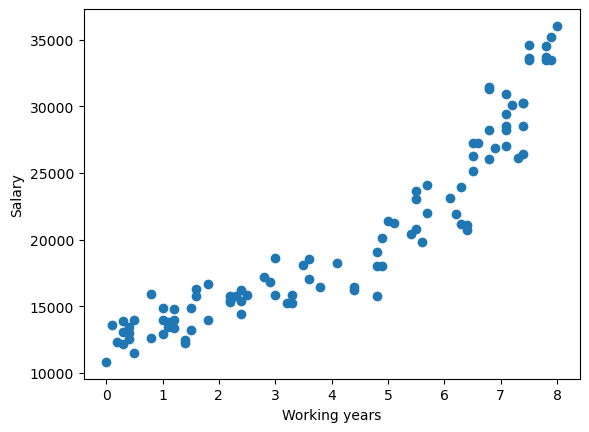

In [24]:
# Visualize the distribution of raw data
X = data[['Working_years']]
Y = data['Salary']
plt.scatter(X,Y)
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.show()

### <font face="Times New Roman">We can see that the data exhibits a fairly obvious linear relationship. Next, we can construct a linear regression model and visualize the fitted regression line.</font>

In [25]:
# obtain training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, shuffle=True)

In [26]:
# Sort according to the index of the dataframe in the training and testing datasets, to avoid issues when plotting the regression curve later.
import numpy as np
import copy
def sort_dataframe(x_frame, y_frame):
    data_train_list = []
    label_train_list = []

    data_train = x_frame.to_numpy().reshape(-1)
    label_train = y_frame.to_numpy().reshape(-1)

    seq_train = x_frame.index.to_numpy()
    record_train = copy.deepcopy(seq_train)
    record_train.sort()
    for i in record_train:
        loc=np.where(seq_train == i)
        data_train_list.append(data_train[loc])
        label_train_list.append(label_train[loc])
    return data_train_list, label_train_list

X_train, y_train = sort_dataframe(X_train, y_train)
X_test, y_test = sort_dataframe(X_test, y_test)

### 1.2 Model training and prediction

In [27]:
# Build a linear regression model and fit the data
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
print('斜率:', model.coef_)
print('截距:', model.intercept_)

斜率: [[2457.5230196]]
截距: [10333.39376741]


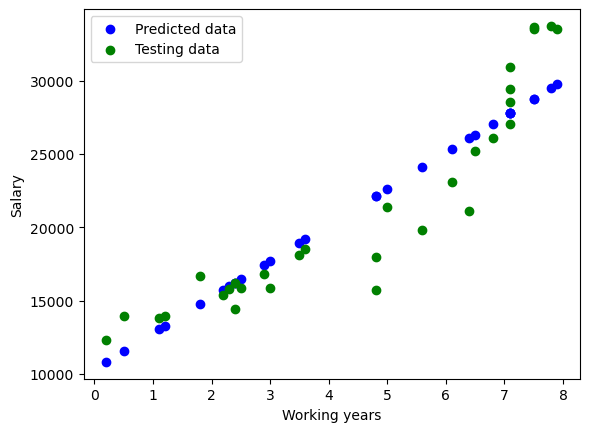

In [28]:
# Prediction
y_test_pred = model.predict(X_test)
plt.scatter(X_test, y_test_pred, color='blue', label='Predicted data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.legend()
plt.show()

### 1.3 Performance metrics

In [29]:
# Calculate R-squared and mean squared error
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)
print('均方误差:', MSE)
print('R方:', R2)


均方误差: 7438585.813648267
R方: 0.8446029242068794


### 1.4 Visualizing results

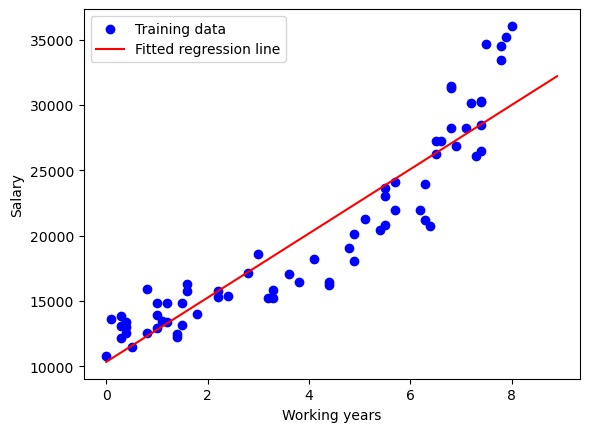

In [30]:
# Plot the fitted regression line on the training dataset.
x_label = np.arange(0,max(X_train)[0]+1,0.1).reshape(-1,1)
y_label = model.predict(x_label)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(x_label, y_label, color='red', label='Fitted regression line')
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.legend()
plt.show()


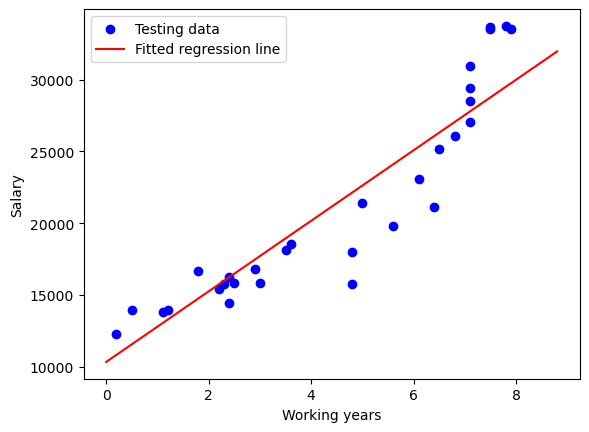

In [31]:
# Plot the fitted regression line on the testing dataset.
from matplotlib import pyplot as plt
x_label_test = np.arange(0,max(X_test)[0]+1,0.1).reshape(-1,1)
y_label_test = model.predict(x_label_test)
plt.scatter(X_test, y_test, color='blue', label='Testing data')
plt.plot(x_label_test, y_label_test, color='red', label='Fitted regression line')
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.legend()
plt.show()


### 1.5 Construction of the Linear Regression Equation

In [32]:
print('The weight coefficient is: ' + str(model.coef_[0]))
print('The bias coefficient is: ' + str(model.intercept_))

The weight coefficient is: [2457.5230196]
The bias coefficient is: [10333.39376741]


Thus, the equation of the fitted linear regression curve is:：y = 2457.52*x + 10333.39

## 2. Univariate Polynomial Linear Regression Model
For example, the general form of the univariate quadratic linear regression model is:
**y = a*x^2 + b*x + c**


In [33]:
from sklearn.preprocessing import PolynomialFeatures
# Fit the data using a quadratic polynomial.

poly_reg = PolynomialFeatures(degree=3)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)




In [34]:
# Build a linear regression model and fit the data

model_2 = LinearRegression(fit_intercept=True)
model_2.fit(X_train_poly, y_train)
print('斜率:', model_2.coef_)
print('截距:', model_2.intercept_)


斜率: [[   0.         1965.62608317 -435.94250768   68.87291066]]
截距: [12177.96974003]


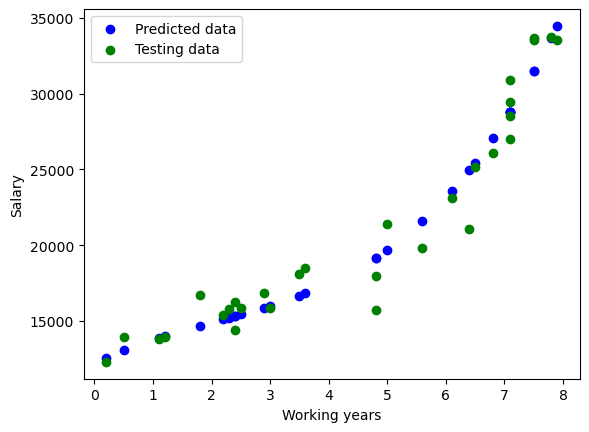

In [35]:
# Prediction

y_pred2 = model_2.predict(X_test_poly)
plt.scatter(X_test, y_pred2, color='blue', label='Predicted data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [36]:
# Calculate R-squared and mean squared error

r2_train = r2_score(y_test, y_pred2)
print('R方:', r2_train)
MSE_train = mean_squared_error(y_test, y_pred2)
print('均方误差:', MSE_train)




R方: 0.9537933086454643
均方误差: 2211833.3762152377


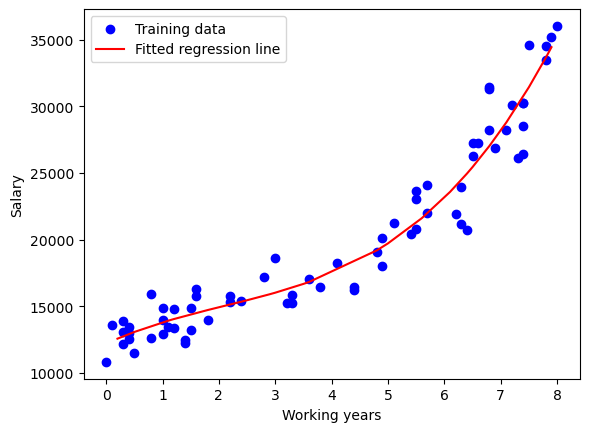

In [37]:
# Plot the fitted regression line on the training dataset.

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_test, y_pred2, color='red', label='Fitted regression line')
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.legend()
plt.show()

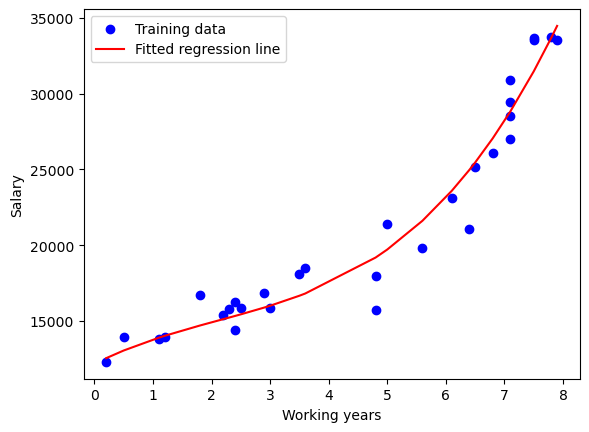

In [38]:
# Plot the fitted regression line on the testing dataset.

plt.scatter(X_test, y_test, color='blue', label='Training data')
plt.plot(X_test, y_pred2, color='red', label='Fitted regression line')
plt.xlabel('Working years')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [39]:
print('The weight coefficient is: ' + str(model_2.coef_))
print('The bias coefficient is: ' + str(model_2.intercept_))

The weight coefficient is: [[   0.         1965.62608317 -435.94250768   68.87291066]]
The bias coefficient is: [12177.96974003]


**y = 394.74*x^2 - 661.01*x + 13725.13**